In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.isnull().values.any()

False

In [4]:
## in this "customer ID, genre and Age" column wont have significant effect as "Spending" fully depends on "Annual income"
## so we can ignore those columns

x=dataset.iloc[0:, 3:5]
x=x.values

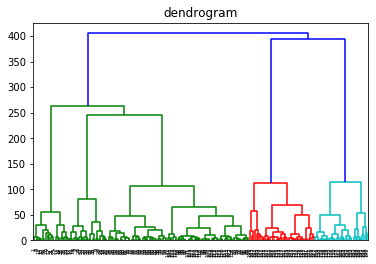

In [5]:
import scipy.cluster.hierarchy as sch

dendrogram=sch.dendrogram(sch.linkage(x, method='ward'))

plt.title("dendrogram")
plt.xlabel("")
plt.ylabel("")
plt.show()



## the above dendrogram shows that we can have 5 groups(clusters),
## as the 3rd green vertical line is not intersected by any other horizontal line.

In [6]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model=agglo.fit_predict(x)
model

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

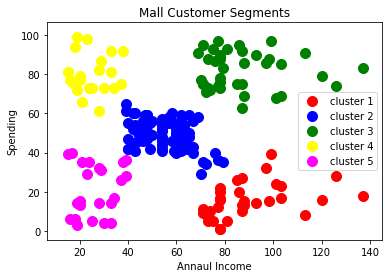

In [7]:
plt.scatter(x[model == 0,0], x[model == 0,1], s=100, c='red', label='cluster 1')
plt.scatter(x[model == 1,0], x[model == 1,1], s=100, c='blue', label='cluster 2')
plt.scatter(x[model == 2,0], x[model == 2,1], s=100, c='green', label='cluster 3')
plt.scatter(x[model == 3,0], x[model == 3,1], s=100, c='yellow', label='cluster 4')
plt.scatter(x[model == 4,0], x[model == 4,1], s=100, c='magenta', label='cluster 5')

plt.title("Mall Customer Segments")
plt.xlabel("Annaul Income")
plt.ylabel("Spending")
plt.legend()
plt.show()

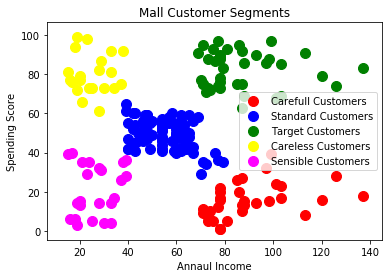

In [8]:
## The above graph clearly explains about the customer segments.
## from the above we can easily interperate the results as below,


## cluster 1 - Red Colour     -    High Income, Low Spending    =   "Carefull Customers"
## cluster 2 - Blue Colour    -    Avg income, Avg spenidng     =   "Standard Customers"
## Cluster 3 - Green Colour   -    HIgh Income, High Spending   =   "Target Customers"
## Cluster 4 - Yellow Colour  -    LOw Income, High Spending    =   "Careless Customers"
## Cluster 5 - Magenta Colour -    Low Income, Low Spending     =   "Sensible Customers"


plt.scatter(x[model == 0,0], x[model == 0,1], s=100, c='red', label='Carefull Customers')
plt.scatter(x[model == 1,0], x[model == 1,1], s=100, c='blue', label='Standard Customers')
plt.scatter(x[model == 2,0], x[model == 2,1], s=100, c='green', label='Target Customers')
plt.scatter(x[model == 3,0], x[model == 3,1], s=100, c='yellow', label ='Careless Customers')
plt.scatter(x[model == 4,0], x[model == 4,1], s=100, c='magenta', label='Sensible Customers')

plt.title("Mall Customer Segments")
plt.xlabel("Annaul Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()